![](images/header_05.png)<br>

<hr style="border-width: 3px;">

# Reporte de homicidios en Estados Unidos

### Colaboración de Lizeth Soto Félix

## Comprensión de los datos


### <span style="color:#313f9e; font-weight: bold;">Recolección inicial de datos:</span>

Los datos que emplearemos en este proyecto están disponibles en el sitio de [Kaggle](https://www.kaggle.com/murderaccountability/homicide-reports) e incluye reportes de homicidios en Estados Unidos entre los años 1980 y 2014. El propio sitio del *[Murder Accountability Project](http://www.murderdata.org/p/data-docs.html)* proporciona datos actualizados, aunque no hay una coincidencia completa de las variables utilizadas en ambos conjuntos de datos.

In [1]:
# Importar bibliotecas básicas
import pandas as pd
import numpy as np

# Condiciones de despliegue de los datos
pd.set_option('display.max_columns', 130)
pd.set_option('max_colwidth', 80)

# Importar los datos
path = "Data sets/Homicide Reports/"
murders_df = pd.read_csv(path + "database.csv", low_memory=False)

### <span style="color:#313f9e; font-weight: bold;">Exploración de los datos:</span>

La forma más simple de analizar los datos, ya cargados en un objeto Dataframe, es a través del método <code style="background-color:#ffffff;">DataFrame.info()</code>:

In [2]:
print(murders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [3]:
display(murders_df.head())
display(murders_df.tail())

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,White,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


Del documento *[Data Dictionary for amplified Supplementary Homicide Report](https://www.dropbox.com/s/lo6tgo8nnbpqeru/MAPdefinitionsSHR.pdf?dl=1)* se desprende la siguiente descripción de las variables anteriores (los nombres de las columnas son diferentes):

<ol>
    <li><em>Record ID</em>: Identificador de registro consecutivo, iniciando en uno.</li>
    <li><em>Agency Code</em>:</li>
    <li><em>Agency Name</em>:</li>
    <li><em>Agency Type</em>:</li>
    <li><em>City</em>: Ciudad en la que se encuentra la agencia que originó el reporte.</li>
    <li><em>State</em>: Nombre del Estado en el que se encuentra la agencia que originó el reporte.</li>
    <li><em>Year</em>: Año en el que ocurrió el asesinato o en el que se recuperó el cadaver.</li>
    <li><em>Month</em>: Mes en el que ocurrió el asesinato o en el que se recuperó el cadaver.</li>
    <li><em>Incident</em>: Número de caso dentro del mes en que ocurrió un homicidio. Es una variable auxiliar para organizar los datos.</li>
    <li><em>Crime Type</em>: Tipo de crimen.</li>
    <li><em>Crime Solved</em>: Indicador de caso resuelto.</li>
    <li><em>Victim Sex</em>: Sexo de la víctima.</li>
    <li><em>Victim Age</em>: Edad de la víctima.</li>
    <li><em>Victim Race</em>: Raza de la víctima.</li>
    <li><em>Victim Ethnicity</em>: Grupo étnico de la víctima.</li>
    <li><em>Perpetrator Sex</em>: Sexo del perpetrador.</li>
    <li><em>Perpetrator Age</em>: Edad del perpetrador.</li>
    <li><em>Perpetrator Race</em>: Raza del perpetrador.</li>
    <li><em>Perpetrator Ethnicity</em>: Grupo étnico del perpetrador.</li>
    <li><em>Relationship</em>: Relación entre la víctima y el perpetrador.</li>
    <li><em>Weapon</em>: Arma utilizada en el crimen.</li>
    <li><em>Victim Count</em>: Cantidad de víctimas del homicida.</li>
    <li><em>Perpetrator Count</em>: Número de perpetradores en un homicidio.</li>
    <li><em>Record Source</em>: Fuente del registro.</li>
</ol>

In [4]:
display(murders_df.iloc[:,0:8].describe(include='all'))
display(murders_df.iloc[:,8:16].describe(include='all'))
display(murders_df.iloc[:,16:].describe(include='all'))

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month
count,638454.00000,638454,638454,638454,638454,638454,638454.000000,638454
unique,NaN,12003,9216,7,1782,51,NaN,12
top,NaN,NY03030,New York,Municipal Police,Los Angeles,California,NaN,July
freq,NaN,38416,38416,493026,44511,99783,NaN,58696
mean,319227.50000,NaN,NaN,NaN,NaN,NaN,1995.801102,NaN
std,184305.93872,NaN,NaN,NaN,NaN,NaN,9.927693,NaN
min,1.00000,NaN,NaN,NaN,NaN,NaN,1980.000000,NaN
25%,159614.25000,NaN,NaN,NaN,NaN,NaN,1987.000000,NaN
50%,319227.50000,NaN,NaN,NaN,NaN,NaN,1995.000000,NaN
75%,478840.75000,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN


,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex
count,638454.000000,638454,638454,638454,638454.000000,638454,638454,638454
unique,NaN,2,2,3,NaN,5,3,3
top,NaN,Murder or Manslaughter,Yes,Male,NaN,White,Unknown,Male
freq,NaN,629338,448172,494125,NaN,317422,368303,399541
mean,22.967924,NaN,NaN,NaN,35.033512,NaN,NaN,NaN
std,92.149821,NaN,NaN,NaN,41.628306,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1.000000,NaN,NaN,NaN,22.000000,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,30.000000,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN,42.000000,NaN,NaN,NaN


,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
count,638454,638454,638454,638454,638454,638454.000000,638454.000000,638454
unique,101,5,3,28,16,NaN,NaN,2
top,0,White,Unknown,Unknown,Handgun,NaN,NaN,FBI
freq,216327,218243,446410,273013,317484,NaN,NaN,616647
mean,NaN,NaN,NaN,NaN,NaN,0.123334,0.185224,NaN
std,NaN,NaN,NaN,NaN,NaN,0.537733,0.585496,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN


<div style="border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
<ul>
<li>Como puede observarse, el método <code style="background-color:#f7f7f7;">describe()</code> despliega, por default, los análisis sólo para los datos numéricos.</li>
<li>Se incluye el análisis de <code style="background-color:#f7f7f7;">Respondent</code>, lo cual no arroja información útil al ser el ID del usuario.</li>
<li>Observemos que, mientras que hay 98855 registros en la tabla, la variable <code style="background-color:#f7f7f7;">count</code> en las otras columnas numéricas no supera 2/3 partes, lo cual indica que al menos 1/3 parte de los encuestados no respondió estas preguntas.</li>
<li>Se pueden obtener algunas conclusiones preliminares analizando estos datos, por ejemplo, la respuesta mejor rankeada a la pregunta "Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance..." fue la número 9: "The diversity of the company or organization". Aunque este resultado, por ejemplo, ya es un indicador interesante para los reclutadores, su alcance es muy vago.</li>
</ul>
<br>

Para analizar las respuestas a las demás preguntas, agregamos el atributo <code style="background-color:#f7f7f7;">include</code>:
</div>

In [6]:
print(murders_df.describe(include="all"))

           Record ID Agency Code Agency Name       Agency Type         City  \
count   638454.00000      638454      638454            638454       638454   
unique           NaN       12003        9216                 7         1782   
top              NaN     NY03030    New York  Municipal Police  Los Angeles   
freq             NaN       38416       38416            493026        44511   
mean    319227.50000         NaN         NaN               NaN          NaN   
std     184305.93872         NaN         NaN               NaN          NaN   
min          1.00000         NaN         NaN               NaN          NaN   
25%     159614.25000         NaN         NaN               NaN          NaN   
50%     319227.50000         NaN         NaN               NaN          NaN   
75%     478840.75000         NaN         NaN               NaN          NaN   
max     638454.00000         NaN         NaN               NaN          NaN   

             State           Year   Month       Inc

<div style="border: 1px solid #cfcfcf; padding: 8px 12px; border-radius:2px; background-color:#f7f7f7;">
Para un análisis más descriptivo, particularmente para el caso de las variables categóricas, analicemos las distribución de las respuestas por pregunta.
</div>

In [7]:
import plotly as py
import plotly.graph_objs as go
from datetime import datetime
from IPython.display import display, HTML
from collections import Counter
import csv
import plotly.figure_factory as ff

py.offline.init_notebook_mode(connected=True)

In [12]:
# Contabiliza etiquetas
def get_counters(col_name, label):
    full_list = ";".join(col_name)
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word, columns = [label, "Cases"])

#Numeric
def get_counters_numeric(col, label):
    series = col.value_counts()
    return pd.DataFrame({label: list(series.keys()), "Cases": list(series)}, 
                    columns = [label, "Cases"])

# Calcular porcentajes
def percent (row, col):
    count = murders_df[col].count()
    return 100 * row[1] / count

#Pie
def get_fig_pie(data, hole = 0, pull = 0):
    labels = [w if len(w)<=30 else w[0:30]+"..." for w in data.iloc[:,0]]
    colors = ['#f7e6ff','#e6b3ff','#bb33ff','#8800cc' ,'#550080','#dd99ff','#cc66ff','#b31aff','#c44dff',
              '#7700b3','#440066','#220033','#11001a','#660099','#eeccff','#d580ff','#9900e6','#aa00ff','#33004d']
    dg = [
        go.Pie(labels=labels, 
               values=data.iloc[0:,1],
               hole = hole,
               pull = pull,
               hoverinfo = "label+percent",
               textfont=dict(size=15),
               marker=dict(colors=colors,line=dict(color='#000000', width=1) 
                           ))
    ]
    layout = go.Layout(
        autosize=False,
        width=750,
        height=500,
    )
    return go.Figure(data=dg, layout=layout)

#Barras
def get_fig_bar(data):
    dg = [go.Bar(
        x=data.iloc[:, 0],
        y=data.iloc[:, 1],
        marker=dict(
            color='rgb(217, 102, 255)',
            line=dict(
                color='rgb(0,0,0)',
                width=0.5),
        )
    )]
    
    layout = go.Layout(
        xaxis=dict(
            title=list(data)[0],
            dtick=2.0,
            tickangle=90,
            
            
        ),
        yaxis=dict(
            title=list(data)[1]
        )
    )
    return go.Figure(data=dg, layout=layout)

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
State in which the crime was commited
</div>

</div>

In [9]:
data_x = get_counters(murders_df['State'].dropna(), "State")

with open(path + 'states.csv') as f:
    states = dict(filter(None, csv.reader(f)))
    
test123 = pd.DataFrame(list(states.items()), columns=['State', 'Code'])

states_dict = dict(zip(test123.State, test123.Code))

murders_df['County'] = murders_df.apply(lambda row: row.City + ', ' + states[row.State], axis=1)

data_x['Code'] = data_x.apply(lambda row: states_dict[row.State],axis=1)
display(data_x)

,State,Cases,Code
0,California,99783,CA
1,Texas,62095,TX
2,New York,49268,NY
3,Florida,37164,FL
4,Michigan,28448,MI
5,Illinois,25871,IL
6,Pennsylvania,24236,PA
7,Georgia,21088,GA
8,North Carolina,20390,NC
9,Louisiana,19629,LA


In [10]:
data = [ dict(
        type='choropleth',
        #colorscale = scl,
        autocolorscale = True,
        locations = data_x['Code'], #Aqui necesito codigo (AL, TX etc)
        locationmode = 'USA-states',

        z = data_x['Cases'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Cases")
        ) ]

layout = dict(
        title = 'USA homicide reports from 1980-2014',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.offline.iplot( fig, filename='d3-cloropleth-map' )

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
City in which the crime was committed
</div>

</div>

In [13]:
print(murders_df['City'].describe())

print('')
data = get_counters(murders_df['City'].dropna(), "City")

print(data.describe(include="all"))

data['Porcentaje'] = data.apply (lambda row: percent (row, 'City'),axis=1)

#display(HTML(data.to_html()))

count          638454
unique           1782
top       Los Angeles
freq            44511
Name: City, dtype: object

          City         Cases
count     1782   1782.000000
unique    1782           NaN
top     Fergus           NaN
freq         1           NaN
mean       NaN    358.279461
std        NaN   1843.878372
min        NaN      1.000000
25%        NaN     15.000000
50%        NaN     41.000000
75%        NaN    154.000000
max        NaN  44511.000000


In [15]:
murders_df['County'] = murders_df.apply(lambda row: row.City + ', ' + row.State, axis=1)

def get_counties():
    full_list = ";".join(murders_df['County'].dropna())
    each_word = full_list.split(";")
    each_word = Counter(each_word).most_common()
    return pd.DataFrame(each_word, columns = ["City", "Cases"])

data = get_counties()
data['Porcentaje'] = data.apply (lambda row: percent (row, 'City'),axis=1)

display(HTML(data.to_html()))

,City,Cases,Porcentaje
0,"Los Angeles, California",44511,6.971685
1,"New York, New York",38431,6.019384
2,"Cook, Illinois",22338,3.498764
3,"Wayne, Michigan",19038,2.981891
4,"Harris, Texas",16300,2.553042
5,"Philadelphia, Pennsylvania",12851,2.012831
6,"Dallas, Texas",11148,1.746093
7,"Baltimore city, Maryland",9336,1.462282
8,"Dade, Florida",9054,1.418113
9,"Maricopa, Arizona",8582,1.344185


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Month in which the crime was committed
</div>

</div>

In [16]:
print(murders_df['Month'].describe())

dato = get_counters(murders_df['Month'].dropna(), "Month")

print("")
print(dato)
months =["January", "February", "March","April","May",
                                          "June","July","August","September","October", "November","December"]

dict_x = dict(zip(dato.Month, dato.Cases))

cases_l = []

for m in months:
    cases_l.append(dict_x[m])
    
testdf = pd.DataFrame(
    {'Months': months,
     'Cases': cases_l
    })

dat = [go.Scatter(x=testdf.Months,
                  y=testdf.Cases,
                  marker=dict(
                    color='rgb(217, 102, 255)',
                    line=dict(
                        color='rgb(0,0,0)',
                        width=0.5),
                 )
                 )]

py.offline.iplot(dat)

count     638454
unique        12
top         July
freq       58696
Name: Month, dtype: object

        Month  Cases
0        July  58696
1      August  58072
2    December  55187
3   September  54117
4        June  53662
5     October  53650
6         May  53394
7     January  52928
8       March  51444
9       April  51209
10   November  50016
11   February  46079


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Incident
</div>

</div>

In [17]:
#No se que es esto


print(murders_df['Incident'].describe())

data = get_counters_numeric(murders_df['Incident'].dropna(), "Incident")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Incident'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count    638454.000000
mean         22.967924
std          92.149821
min           0.000000
25%           1.000000
50%           2.000000
75%          10.000000
max         999.000000
Name: Incident, dtype: float64


,Incident,Cases,Porcentaje
0,1,265528,41.589214
1,2,71779,11.242627
2,3,39236,6.145470
3,4,27113,4.246665
4,5,20658,3.235629
5,6,16516,2.586874
6,7,13656,2.138917
7,8,11633,1.822058
8,9,9943,1.557356
9,10,8633,1.352173


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Year
</div>

</div>

In [18]:
print(murders_df['Year'].describe())

data = get_counters_numeric(murders_df['Year'].dropna(), "Year")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Year'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count    638454.000000
mean       1995.801102
std           9.927693
min        1980.000000
25%        1987.000000
50%        1995.000000
75%        2004.000000
max        2014.000000
Name: Year, dtype: float64


,Year,Cases,Porcentaje
0,1993,24335,3.811551
1,1992,23793,3.726658
2,1994,23246,3.640983
3,1980,23092,3.616862
4,1991,22657,3.548729
5,1990,21246,3.327726
6,1981,21208,3.321774
7,1995,21179,3.317232
8,1982,20544,3.217773
9,1986,20125,3.152146


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:20%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Crime Type
</div>

</div>

In [19]:
print(murders_df['Crime Type'].describe())

data = get_counters(murders_df['Crime Type'].dropna(), "Crime Type")

data['Porcentaje'] = data.apply (lambda row: percent (row, 'Crime Type'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.05)
py.offline.iplot(fig)

count                     638454
unique                         2
top       Murder or Manslaughter
freq                      629338
Name: Crime Type, dtype: object


,Crime Type,Cases,Porcentaje
0,Murder or Manslaughter,629338,98.572176
1,Manslaughter by Negligence,9116,1.427824


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Agency Type
</div>

</div>

In [20]:
print(murders_df['Agency Type'].describe())

data = get_counters(murders_df['Agency Type'].dropna(), "Agency Type")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Agency Type'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count               638454
unique                   7
top       Municipal Police
freq                493026
Name: Agency Type, dtype: object


,Agency Type,Cases,Porcentaje
0,Municipal Police,493026,77.221852
1,Sheriff,105322,16.496412
2,County Police,22693,3.554367
3,State Police,14235,2.229605
4,Special Police,2889,0.452499
5,Regional Police,235,0.036808
6,Tribal Police,54,0.008458


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Crime solved
</div>

</div>

In [21]:
print(murders_df['Crime Solved'].describe())

data = get_counters(murders_df['Crime Solved'].dropna(), "Crime Solved")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Crime Solved'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         2
top          Yes
freq      448172
Name: Crime Solved, dtype: object


,Crime Solved,Cases,Porcentaje
0,Yes,448172,70.196443
1,No,190282,29.803557


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim age
</div>

</div>

In [22]:
#wtf

print(murders_df['Victim Age'].describe())

data = get_counters_numeric(murders_df['Victim Age'].dropna(), "Victim Age")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Age'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count    638454.000000
mean         35.033512
std          41.628306
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max         998.000000
Name: Victim Age, dtype: float64


,Victim Age,Cases,Porcentaje
0,22,23049,3.610127
1,20,23031,3.607308
2,25,22939,3.592898
3,21,22796,3.570500
4,23,22438,3.514427
5,19,21939,3.436269
6,24,21830,3.419197
7,26,20469,3.206026
8,27,19465,3.048771
9,30,18966,2.970613


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px;">
A continuación se pondran en null provicionalmente los casos de edad "998". Es necesario analizar si los autores utilizaron la etiqueta con algún significado.
</div>

</div>

In [25]:
murders_df.loc[murders_df['Victim Age'] == 998,'Victim Age'] = np.nan

print(murders_df['Victim Age'].describe())

data = get_counters_numeric(murders_df['Victim Age'].dropna(), "Victim Age")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Age'),axis=1)
fig = get_fig_bar(data)
py.offline.iplot(fig)

count    637480.000000
mean         33.562204
std          17.792594
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max          99.000000
Name: Victim Age, dtype: float64


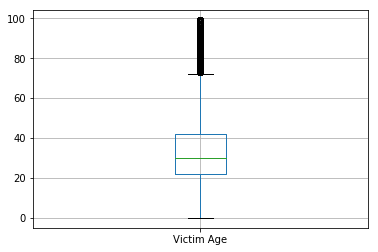

In [27]:
import matplotlib
import matplotlib.pyplot as plt


murders_df.boxplot(column='Victim Age')
plt.show()

<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim sex
</div>

</div>

In [28]:
print(murders_df['Victim Sex'].describe())

data = get_counters(murders_df['Victim Sex'].dropna(), "Victim Sex")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Sex'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data,pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         3
top         Male
freq      494125
Name: Victim Sex, dtype: object


,Victim Sex,Cases,Porcentaje
0,Male,494125,77.393986
1,Female,143345,22.451892
2,Unknown,984,0.154122


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim race
</div>

</div>

In [29]:
print(murders_df['Victim Race'].describe())

data = get_counters(murders_df['Victim Race'].dropna(), "Victim Race")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Race'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data,pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         5
top        White
freq      317422
Name: Victim Race, dtype: object


,Victim Race,Cases,Porcentaje
0,White,317422,49.717286
1,Black,299899,46.972687
2,Asian/Pacific Islander,9890,1.549054
3,Unknown,6676,1.045651
4,Native American/Alaska Native,4567,0.715322


In [30]:
counterC = 0

for index, row in murders_df.iterrows():
    if (row['City'] == 'Los Angeles') & (row['Crime Solved'] == 'No'):
        counterC = counterC +1

print('Los Angeles ',(counterC*100)/44511)

Los Angeles  40.01258115971333


In [31]:

counterC = 0

for index, row in murders_df.iterrows():
    if (row['City'] == 'Cook') & (row['Crime Solved'] == 'No'):
        counterC = counterC +1

print('Cook ',(counterC*100)/22338)

Cook  40.77356970185335


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim ethnicity
</div>

</div>

In [32]:
print(murders_df['Victim Ethnicity'].describe())

data = get_counters(murders_df['Victim Ethnicity'].dropna(), "Victim Ethnicity")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Ethnicity'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count      638454
unique          3
top       Unknown
freq       368303
Name: Victim Ethnicity, dtype: object


,Victim Ethnicity,Cases,Porcentaje
0,Unknown,368303,57.686693
1,Not Hispanic,197499,30.933944
2,Hispanic,72652,11.379363


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim count
</div>

</div>

In [33]:
print(murders_df['Victim Count'].describe())

data = get_counters_numeric(murders_df['Victim Count'].dropna(), "Victim Count")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Victim Count'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count    638454.000000
mean          0.123334
std           0.537733
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: Victim Count, dtype: float64


,Victim Count,Cases,Porcentaje
0,0,586059,91.793457
1,1,38750,6.069349
2,2,8156,1.277461
3,3,2847,0.445921
4,4,1084,0.169785
5,5,510,0.079880
6,9,290,0.045422
7,6,286,0.044796
8,7,168,0.026314
9,10,160,0.025061


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Perpetrator sex
</div>

</div>

In [34]:
print(murders_df['Perpetrator Sex'].describe())

data = get_counters(murders_df['Perpetrator Sex'].dropna(), "Perpetrator Sex")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Perpetrator Sex'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         3
top         Male
freq      399541
Name: Perpetrator Sex, dtype: object


,Perpetrator Sex,Cases,Porcentaje
0,Male,399541,62.579450
1,Unknown,190365,29.816557
2,Female,48548,7.603993


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Perpetrator age
</div>

</div>

In [35]:
print(murders_df['Perpetrator Age'].describe())

data = get_counters(murders_df['Perpetrator Age'].dropna(), "Perpetrator Age")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Perpetrator Age'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count     638454
unique       101
top            0
freq      216327
Name: Perpetrator Age, dtype: object


,Perpetrator Age,Cases,Porcentaje
0,0,216327,33.882942
1,20,21625,3.387088
2,19,20250,3.171724
3,21,18983,2.973276
4,18,18834,2.949938
5,22,18433,2.887130
6,23,17604,2.757286
7,25,17542,2.747575
8,24,16379,2.565416
9,26,14716,2.304943


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Perpetrator race
</div>

</div>

In [36]:
print(murders_df['Perpetrator Race'].describe())

data = get_counters(murders_df['Perpetrator Race'].dropna(), "Perpetrator Race")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Perpetrator Race'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         5
top        White
freq      218243
Name: Perpetrator Race, dtype: object


,Perpetrator Race,Cases,Porcentaje
0,White,218243,34.183042
1,Black,214516,33.599288
2,Unknown,196047,30.706519
3,Asian/Pacific Islander,6046,0.946975
4,Native American/Alaska Native,3602,0.564175


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Perpetrator ethnicity
</div>

</div>

In [37]:
print(murders_df['Perpetrator Ethnicity'].describe())

data = get_counters(murders_df['Perpetrator Ethnicity'].dropna(), "Perpetrator Ethnicity")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Perpetrator Ethnicity'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count      638454
unique          3
top       Unknown
freq       446410
Name: Perpetrator Ethnicity, dtype: object


,Perpetrator Ethnicity,Cases,Porcentaje
0,Unknown,446410,69.920464
1,Not Hispanic,145172,22.738052
2,Hispanic,46872,7.341484


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Perpetrator count
</div>

</div>

In [38]:
print(murders_df['Perpetrator Count'].describe())

data = get_counters_numeric(murders_df['Perpetrator Count'].dropna(), "Perpetrator Count")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Perpetrator Count'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_bar(data)
py.offline.iplot(fig)

count    638454.000000
mean          0.185224
std           0.585496
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: Perpetrator Count, dtype: float64


,Perpetrator Count,Cases,Porcentaje
0,0,558838,87.529877
1,1,54745,8.574619
2,2,15777,2.471126
3,3,6531,1.022940
4,4,1489,0.233220
5,5,592,0.092724
6,6,207,0.032422
7,7,129,0.020205
8,9,52,0.008145
9,8,52,0.008145


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Relationship of the victim with the perpetrator
</div>

</div>

In [39]:
print(murders_df['Relationship'].describe())

data = get_counters(murders_df['Relationship'].dropna(), "Relationship")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Relationship'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count      638454
unique         28
top       Unknown
freq       273013
Name: Relationship, dtype: object


,Relationship,Cases,Porcentaje
0,Unknown,273013,42.761577
1,Acquaintance,126018,19.737992
2,Stranger,96593,15.129203
3,Wife,23187,3.631742
4,Friend,21945,3.437209
5,Girlfriend,16465,2.578886
6,Son,9904,1.551247
7,Family,9535,1.493451
8,Husband,8803,1.378799
9,Daughter,7539,1.180821


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Weapon
</div>

</div>

In [40]:
print(murders_df['Weapon'].describe())

data = get_counters(murders_df['Weapon'].dropna(), "Weapon")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Weapon'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count      638454
unique         16
top       Handgun
freq       317484
Name: Weapon, dtype: object


,Weapon,Cases,Porcentaje
0,Handgun,317484,49.726997
1,Knife,94962,14.873742
2,Blunt Object,67337,10.546884
3,Firearm,46980,7.358400
4,Unknown,33192,5.198808
5,Shotgun,30722,4.811936
6,Rifle,23347,3.656802
7,Strangulation,8110,1.270256
8,Fire,6173,0.966867
9,Suffocation,3968,0.621501


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Record Source
</div>

</div>

In [41]:
print(murders_df['Record Source'].describe())

data = get_counters(murders_df['Record Source'].dropna(), "Record Source")
data['Porcentaje'] = data.apply (lambda row: percent (row, 'Record Source'),axis=1)
display(HTML(data.to_html()))

fig = get_fig_pie(data, pull = 0.025)
py.offline.iplot(fig)

count     638454
unique         2
top          FBI
freq      616647
Name: Record Source, dtype: object


,Record Source,Cases,Porcentaje
0,FBI,616647,96.584405
1,FOIA,21807,3.415595


<hr style="border-width: 3px;">

<div style="width:100%; overflow:hidden;">
<div style="width:100%; float:left; padding-right:5px; color:purple; font-weight: bold;">
Victim Race - Crime Solved relation
</div>

</div>

In [ ]:
counterB = 0
counterW = 0
counterAP = 0
counterNA = 0

for index, row in df.iterrows():
    if (row['Victim Race'] == 'Black') & (row['Crime Solved'] == 'No'):
        counterB = counterB +1
        
for index, row in df.iterrows():
    if (row['Victim Race'] == 'White') & (row['Crime Solved'] == 'No'):
        counterW = counterW +1
        
for index, row in df.iterrows():
    if (row['Victim Race'] == 'Asian/Pacific Islander') & (row['Crime Solved'] == 'No'):
        counterAP = counterAP +1
        
for index, row in df.iterrows():
    if (row['Victim Race'] == 'Native American/Alaska Native') & (row['Crime Solved'] == 'No'):
        counterNA = counterNA +1

In [ ]:
black = [{'Crime Solved Victim Black': 'Yes', 'Cases': 299899-counterB, 'Percentage': 100-(counterB*100)/299899},
         {'Crime Solved Victim Black': 'No',  'Cases': counterB, 'Percentage': (counterB*100)/299899}]
data_black_solved = pd.DataFrame(black) 
data_black_solved = data_black_solved[['Crime Solved Victim Black','Cases','Percentage']]
display(HTML(data_black_solved.to_html()))

fig = get_fig_pie(data_black_solved,pull = 0.025)
py.offline.iplot(fig)

In [ ]:
asian_pacific_islander = [{'Crime Solved Victim Asian/P Islander': 'Yes', 'Cases': 9890-counterAP, 'Percentage': 100-(counterAP*100)/9890},
         {'Crime Solved Victim Asian/P Islander': 'No',  'Cases': counterAP, 'Percentage': (counterAP*100)/9890}]
data_asian_pacific_islander_solved = pd.DataFrame(asian_pacific_islander) 
data_asian_pacific_islander_solved = data_asian_pacific_islander_solved[['Crime Solved Victim Asian/P Islander','Cases','Percentage']]
display(HTML(data_asian_pacific_islander_solved.to_html()))

fig = get_fig_pie(data_asian_pacific_islander_solved,pull = 0.025)
py.offline.iplot(fig)

In [ ]:
white = [{'Crime Solved Victim White': 'Yes', 'Cases': 317422-counterW, 'Percentage': 100-(counterW*100)/317422},
         {'Crime Solved Victim White': 'No',  'Cases': counterW, 'Percentage': (counterW*100)/317422}]
data_white_solved = pd.DataFrame(white) 
data_white_solved = data_white_solved[['Crime Solved Victim White','Cases','Percentage']]
display(HTML(data_white_solved.to_html()))

fig = get_fig_pie(data_white_solved,pull = 0.025)
py.offline.iplot(fig)

In [ ]:
native = [{'Crime Solved Victim Native American/Alaska Native': 'Yes', 'Cases': 4567-counterNA, 'Percentage': 100-(counterNA*100)/4567},
         {'Crime Solved Victim Native American/Alaska Native': 'No',  'Cases': counterNA, 'Percentage': (counterNA*100)/4567}]
data_native_solved = pd.DataFrame(native) 
data_native_solved = data_native_solved[['Crime Solved Victim Native American/Alaska Native','Cases','Percentage']]
display(HTML(data_native_solved.to_html()))

fig = get_fig_pie(data_native_solved,pull = 0.025)
py.offline.iplot(fig)

<hr style="border-width: 3px;">

## Conclusiones

* El éxito de un proyecto de reconocimiento de patrones (minería de datos, ciencia de los datos) depende de contar con un conjunto de datos de alta calidad.